<a href="https://colab.research.google.com/github/Abdul-Haseeb-boonig/RNN-LSTM/blob/main/2020008_AI361_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing NLTK libraries
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import reuters

In [ ]:
#importing keras libraries
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [ ]:
#importing other libraries
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

In [ ]:
#downloading the dataset and stop words
nltk.download('reuters')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Extracting from the dataset
train_documents = list(filter(lambda doc: doc.startswith("train"),
                              reuters.fileids()))
test_documents = list(filter(lambda doc: doc.startswith("test"),
                        reuters.fileids()))
train_docs, train_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('training/')])
test_docs, test_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('test/')])

In [ ]:
#creating preprocessing function by removing stopwords and stemming
def parse_words(text): 
    # split document into individual words
    tokens=text.split()
    stop_words= stopwords.words('english')
    # filter out stop words
    tokens = [w for w in tokens if not w in stop_words]         
    # perform word stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    # recreate the document string from parsed words
    text = ''
    for token in tokens:
        text = text + ' ' + token
    return tokens, text

In [ ]:
#applying preprocessing on training dataset
train_tokens = []  # list of token lists
train_text = [] # list of document strings
for doc in train_docs:
    text_string = doc
    tokens, text_string = parse_words(text_string)
    train_tokens.append(tokens)
    train_text.append(text_string)

In [ ]:
#applying preprocessing on the test dataset
test_tokens = []  # list of token lists
test_text = [] # list of document strings
for doc in test_docs:
    text_string = doc
    tokens, text_string = parse_words(text_string)
    test_tokens.append(tokens)
    test_text.append(text_string)

In [ ]:
#spliting the dataset into training and testing with 80:20
file_ids = reuters.fileids()

# Extract the documents and their categories
documents = [reuters.raw(file_id) for file_id in file_ids]
categories = [reuters.categories(file_id) for file_id in file_ids]

# Split the dataset into training and testing sets
train_docs, test_docs, train_categories, test_categories = train_test_split(
    documents, categories, test_size=0.2, random_state=42
)

# Print the sizes of the training and testing sets
print("Training set size:", len(train_docs))
print("Testing set size:", len(test_docs))


Training set size: 8630
Testing set size: 2158


In [ ]:
#Applying TFIDF on Xtrain
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(train_docs)

In [ ]:
#Applying TFIDF on Xtest
X_test = vectorizer.transform(test_docs)

In [ ]:
#converting the train categories into multilabels so it can help us later since all the categories will be in number
train_categories=MultiLabelBinarizer().fit_transform(train_categories)

In [ ]:
#converting the train categories into a list
y_train = []

for i in train_categories:
    y_train.append(i[0])

print(y_train)

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
#dimentionality reduction using pca
pca = PCA(n_components=len(train_documents))
df_pca = pca.fit_transform(X_train.toarray())

In [ ]:
pca = PCA(n_components=len(train_categories))
df_pca = pca.fit_transform(train_categories.toarray())

In [ ]:
target = train_categories.data
data = X_train.data

In [ ]:
ytrain = target[:1000]
Xtrain = data[:1000]

In [ ]:
#Applying RNN
max_features = 100
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(88, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(df_pca, train_categories,
                    epochs=1,
                    batch_size=128)
loss, accuracy = model.evaluate(X_test, test_categories, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

48/48 [==============================] - 2708s 56s/step - loss: 3.8470 - acc: 0.3471 - val_loss: 3.6747 - val_acc: 0.3658


ValueError: ignored

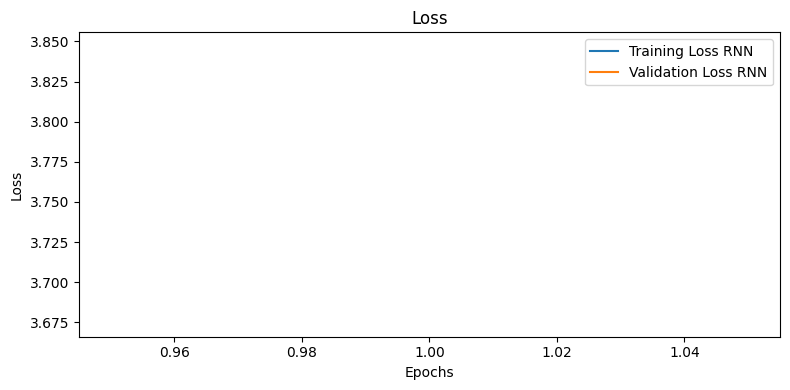

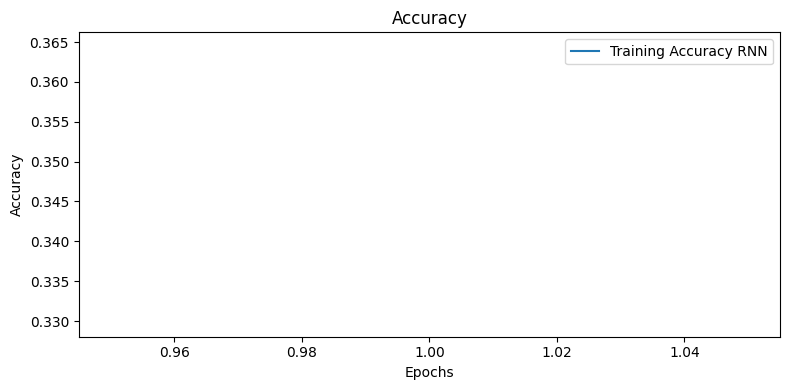

In [ ]:
#calculating the training loss of RNN and plotting it 
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
#val_acc = history.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss RNN')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss RNN')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the accuracy
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy RNN')
#plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy RNN')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_docs)
test_sequences = tokenizer.texts_to_sequences(test_docs)

# Pad sequences to a fixed length
maxlentrain = max(len(seq) for seq in train_sequences)
maxlentest = max(len(seq) for seq in test_sequences)

train_data = pad_sequences(train_sequences, maxlen=maxlentrain)
test_data = pad_sequences(test_sequences, maxlen=maxlentest)

# Prepare the target categories
all_categories = list(set([category for sublist in categories for category in sublist]))
category_index = {category: index for index, category in enumerate(all_categories)}
train_labels = []
for sublist in train_categories:
    labels = [category_index.get(category, -1) for category in sublist]
    train_labels.append(labels)
test_labels = []
for sublist in test_categories:
    labels = [category_index.get(category, -1) for category in sublist]
    test_labels.append(labels)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
num_classes = len(all_categories)

<ipython-input-28-bfcafd28c892>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_labels = np.array(test_labels)


In [ ]:
train_labels_flat = [label for sublist in train_labels for label in sublist]
test_labels_flat = [label for sublist in test_labels for label in sublist]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the combined categories
label_encoder.fit(all_categories)


filtered_train_labels = [label for label in train_labels_flat if label in label_encoder.classes_]
# Filter out unseen labels from the test set
filtered_test_labels = [label for label in test_labels_flat if label in label_encoder.classes_]
# Convert the train labels to numerical values
train_labels_encoded = label_encoder.transform(filtered_train_labels)

# Convert the filtered test labels to numerical values
test_labels_encoded = label_encoder.transform(filtered_test_labels)
num_classes2 = len(label_encoder.classes_)

# Convert the numerical labels to one-hot encoded format
train_labels_encoded = to_categorical(train_labels_encoded, num_classes2)
test_labels_encoded = to_categorical(test_labels_encoded, num_classes2)


<ipython-input-30-77fe627e8ba7>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  filtered_train_labels = [label for label in train_labels_flat if label in label_encoder.classes_]
<ipython-input-30-77fe627e8ba7>:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  filtered_test_labels = [label for label in test_labels_flat if label in label_encoder.classes_]


In [ ]:
# Building the LSTM model and applying it
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=maxlentrain))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history2=model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/5


ValueError: ignored

In [ ]:
#Calculating the loss of LSTM and plotting it
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Plot the loss
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss LSTM')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss LSTM')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the accuracy
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy LSTM')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy LSTM')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

NameError: ignored